In [84]:
import numpy as np
import glob
from collections import defaultdict
import random
import re
import copy
import sys
import importlib
import seaborn as sns
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
from my_plot import MyPlotData

script_n = 'selectivity_across_variability_220320'

In [2]:
def dropN(results, n=3):
    #some results are invalid (stuck at ~50% acc), we'll just drop them
    filtered = copy.deepcopy(results)
    for model in filtered:
        for th in filtered[model]:
            for i in range(n):
                filtered[model][th].remove(min(filtered[model][th]))
    return filtered

In [82]:
# variability = 0.4
num_patterns = 150
sigmoid_scale = 16
test_noise = 0.05
lr = 0.02
momentum = 0.9
num_epochs = 300

variabilities = [i/100 for i in range(5, 105, 5)]

results = defaultdict(lambda: defaultdict(list))
search = re.compile("acc: (.+)")

for variability in variabilities:
#     for pct in [.25, 1.0]:
#     for pct in [.25, .5, 1.0]:
    for pct in [.5, 1.0]:
        for selective in [0, 1]:
            if pct == 1.0 and selective == 1:
                continue
            files = glob.glob(
                f"../pc_test_220320_eval/log_test2_{pct}_{variability}_{num_patterns}_{sigmoid_scale}_{test_noise}_{lr}_{momentum}_{num_epochs}_{selective}_*/results")
            for f in files:
                with open(f) as fin:
                    accs = []
                    for line in fin:
                        m = search.match(line)
                        if m:
                            accs.append(float(m.group(1)))
                    model = f'{pct}_{selective}'
                    results[model][variability].append(max(accs))

filtered_results = dropN(results, n=0)
# for m in filtered_results:
#     print(m)
#     for th in sorted(filtered_results[m]):
#         print(f'{th}: {sorted(filtered_results[m][th])}')

In [ ]:
for m in filtered_results:
    print(m)
    for th in sorted(filtered_results[m]):
        print(f'{th}: {sorted(filtered_results[m][th])}')
#         print()

In [79]:

name_map = {
        '0.25_1': "Selective subsampled",
        '0.5_1': "Selective subsampled",
        '1.0_0': "Fully connected",
        '0.25_0': "Random subsampled",
        '0.5_0': "Random subsampled",
}

palette = {
    name_map['0.25_1']: 'green',
    name_map['0.5_1']: 'green',
    name_map['1.0_0']: 'blue',
    name_map['0.25_0']: 'black',
    name_map['0.5_0']: 'black',
}

Height: 3, Aspect: 1.3333333333333333


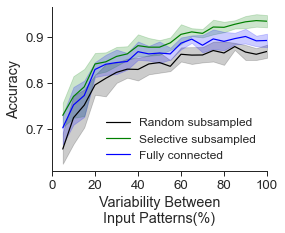

In [83]:

mpd = MyPlotData()

for model in filtered_results:
    if '0.25' in model:
        continue
    for th in filtered_results[model]:
        for v in filtered_results[model][th]:
            mpd.add(
#                 model=model,
                model=name_map[model],
                var=th*100,
#                 removed=(1-th)*100,
                acc=v,
            )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd, x='var', y='acc',
    hue='model',
    context='paper',
    palette=palette,
    width=4, height=3,
    y_axis_label='Accuracy',
    x_axis_label='Variability Between\nInput Patterns(%)',
    xlim=[0, 100],
#     ylim=[0.8, .95],
#     ylim=[0.6, .9],
    save_filename=f'{script_n}_50.svg',
    custom_legend_fn=custom_legend_fn,
    show=True,
    )


Height: 3, Aspect: 1.3333333333333333


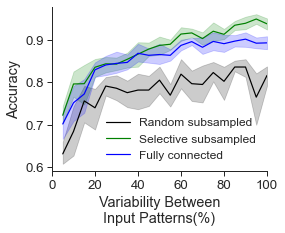

In [80]:

mpd = MyPlotData()

for model in filtered_results:
    if '0.5' in model:
        continue
    for th in filtered_results[model]:
        for v in filtered_results[model][th]:
            mpd.add(
#                 model=model,
                model=name_map[model],
                var=th*100,
#                 removed=(1-th)*100,
                acc=v,
            )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd, x='var', y='acc',
    hue='model',
    context='paper',
    palette=palette,
    width=4, height=3,
    y_axis_label='Accuracy',
    x_axis_label='Variability Between\nInput Patterns(%)',
    xlim=[0, 100],
#     ylim=[0.8, .95],
#     ylim=[0.6, .9],
    save_filename=f'{script_n}_25.svg',
    custom_legend_fn=custom_legend_fn,
    show=True,
    )


In [ ]:
# roc analysis
# data for scaleup4 at 0.4 variability
data = {}
pred, gt = [[0.9949232935905457,0.00044779005111195147,2.076556597785384e-07,0.999053418636322,0.9999744892120361,0.9991771578788757,4.075757260579849e-06,2.016160181028681e-07,0.00014252954861149192,0.9999773502349854,2.0131556084379554e-05,0.08584975451231003,0.007770076859742403,0.999874472618103,0.0036969499196857214,0.0022834441624581814,0.016229761764407158,0.01678256317973137,3.634960012277588e-05,0.9831616878509521,0.00012532150140032172,2.9264085242175497e-05,0.9991815686225891,1.2417308425938245e-05,0.0017708938103169203,0.9999946355819702,0.9895908236503601,0.9996941089630127,0.00010773597023217008,0.0064192647114396095,0.9999896287918091,0.0028042320627719164,0.9999891519546509,0.008345047011971474,0.9994409680366516,4.234070729580708e-05,0.00034500545007176697,0.0015654809540137649,0.9990173578262329,0.9999850988388062,0.0019886125810444355,0.9630500674247742,0.999782383441925,0.9882076382637024,1.0,1.0,5.5260854423977435e-05,0.9993411898612976,0.00010304746683686972,3.9193302825424325e-08,0.9910479187965393,0.00036744485259987414,0.0004953446914441884,4.2559629946481436e-05,0.7135877013206482,2.991678957187105e-05,0.0010342637542635202,0.999882698059082,0.9991239905357361,0.005749927368015051,0.19929255545139313,0.9999563694000244,0.9999793767929077,0.999977707862854,0.9638751149177551,0.00018371467012912035,0.014377705752849579,0.9774382710456848,0.0007263528532348573,0.002624639542773366,7.297386036952958e-05,0.9999672174453735,2.2635383629676653e-06,0.9999991655349731,0.9277694225311279,0.9986364245414734,0.9726594686508179,0.9591181874275208,0.9487457871437073,0.9999852180480957,0.9999998807907104,0.9997978806495667,1.604340241101454e-06,0.9838797450065613,0.5525549650192261,0.0649988055229187,0.013464233838021755,0.9945406317710876,0.16339890658855438,0.00018829658802133054,0.00532930251210928,0.9387428760528564,0.002184996148571372,0.9999544620513916,0.9997074007987976,0.04179493337869644,0.1598624587059021,0.9999992847442627,0.00016920459165703505,0.1362805813550949,0.0009405306191183627,0.15592874586582184,0.999006450176239,0.9999853372573853,0.9008209109306335,0.9999756813049316,0.9930825233459473,0.8103501796722412,1.0,3.319642928545363e-05,0.006626811809837818,0.9980840682983398,0.9459850788116455,0.0001748424838297069,0.5067164301872253,0.9835967421531677,0.0006138652679510415,0.9946236610412598,0.9969773292541504,0.9999920129776001,0.9999982118606567,9.677903562987922e-07,0.9985526204109192,0.9999604225158691,0.9999433755874634,0.06082351505756378,5.9382391555118375e-06,0.9999897480010986,0.05294302478432655,0.0020694152917712927,0.04378393664956093,0.3031214475631714,0.0008298730244860053,0.00065788155188784,0.5202940702438354,0.9647440910339355,0.22559092938899994,0.019933460280299187,0.046948060393333435,0.62209552526474,0.0731794536113739,0.02007521688938141,0.9999966621398926,0.00045940506970509887,0.9983329176902771,0.0003373899671714753,0.9999748468399048,8.380274812225252e-05,0.00010136493074242026,0.02568235620856285,0.9976128339767456,0.999998927116394,0.9999755620956421,0.9443566799163818,3.998083411715925e-05,0.9944023489952087,0.9999998807907104,1.0,0.8040760159492493,0.9999830722808838,0.011915948241949081,0.0026974959764629602,0.4487403333187103,0.12067979574203491,0.0197222251445055,0.9999575614929199,0.0006004167953506112,0.9989319443702698,0.0017758597387000918,0.9965403079986572,0.9998165965080261,0.011351082473993301,0.004665563348680735,0.00010018965258495882,0.999462902545929,0.9998726844787598,0.999956488609314,1.0,0.9532100558280945,0.0007496699690818787,0.12719392776489258,1.0,0.006578593514859676,1.0,0.00012432620860636234,0.904754638671875,0.007326473947614431,0.0022047373931854963,0.9898396730422974,0.006623915396630764,0.762138843536377,0.9889240860939026,0.01913803443312645,0.9999089241027832,0.9990518689155579,1.0280352398694959e-05,0.015021886676549911,0.9999855756759644,0.0053071328438818455,0.0003104062343481928,0.014829273335635662,1.0,0.9996803998947144,0.9788053035736084,0.5089788436889648,0.004276764579117298,0.996323823928833,2.352571755181998e-06,0.9730538725852966,0.9999996423721313,1.8018057744484395e-05,0.020113464444875717,0.41717424988746643,0.9999556541442871,6.042019958840683e-05,0.9106626510620117,0.0002005560090765357,0.9999996423721313,0.000644751766230911,0.47830289602279663,0.9992536902427673,0.9995381832122803,0.4280490279197693,0.9999969005584717,3.575355833618232e-08,9.243532258551568e-05,0.09179728478193283,0.0011902506230399013,0.9955534338951111,0.9995421171188354,0.9926250576972961,5.914867142564617e-05,0.0024459799751639366,0.9431192278862,0.9999581575393677,1.0,0.9999853372573853,0.0035444952081888914,0.9900745749473572,0.9767922759056091,1.4128961993264966e-05,0.9910467267036438,3.15830075123813e-05,0.16219188272953033,0.9999918937683105,0.6647953391075134,0.9999949932098389,0.9996932744979858,0.00459392461925745,0.13410142064094543,0.010386157780885696,0.9739981889724731,1.0,0.9639729261398315,0.8432731628417969,0.032441720366477966,0.9994608759880066,0.004136187024414539,0.00529886782169342,0.9997115731239319,2.1214545995462686e-05,0.007024572230875492,0.0034797482658177614,0.9999998807907104,0.9999996423721313,4.606800575857051e-05,0.0015724293189123273,0.9998181462287903,0.9698646664619446,0.9808470606803894,6.318737177934963e-06,0.0003018248244188726,0.0010495490860193968,0.9923598170280457,0.008232452906668186,0.9997932314872742,1.0,1.0,0.9980562925338745,0.00024285769904963672,0.999947190284729,0.9999946355819702,0.9997965693473816,0.9999303817749023,0.00013738423876930028,0.9970986843109131,0.15734682977199554,0.002247155411168933,1.290718731894458e-08,0.005955358035862446,0.9692316651344299,0.6629676818847656,0.6923240423202515,3.886686499754433e-06,4.071425337315304e-06,0.003829904831945896,0.9350051283836365,0.9991642236709595,7.514537719544023e-05,0.0024149089585989714,1.322480329690734e-05,0.9999885559082031,0.998891294002533,1.7753500003436784e-07,0.9961601495742798,0.014611934311687946,0.017574775964021683,0.0015715223271399736,0.9999068975448608,0.21558663249015808,0.00018550392996985465,0.10485909879207611,0.006035996600985527,1.0,7.727793672529515e-06,0.03034304454922676,0.9999997615814209,0.005107442382723093,0.004515261389315128,0.0029059099033474922,0.9999147653579712,0.9994972944259644,0.8520152568817139,0.0009503460605628788,0.0018831348279491067,6.469043455581414e-06,0.8795581459999084,0.9991865754127502,0.014595883898437023,0.9989069700241089,0.9920780062675476,0.998432457447052,6.021422450430691e-05,0.9997897744178772,0.23235982656478882,0.9999997615814209,0.9999957084655762,0.00010337067215004936,0.8545532822608948,7.005935458437307e-06,0.9993927478790283,0.9991957545280457,0.0001620493712835014,0.994034469127655,0.005139640066772699,0.0040367660112679005,0.01831270009279251,0.970151960849762,0.9999769926071167,0.9921265840530396,0.00564975431188941,0.004200424533337355,0.9999994039535522,0.7573108673095703,0.0012540018651634455,5.4652304243063554e-05,0.9999995231628418,0.9986847043037415,0.998128354549408,6.9067650656506885e-06,0.9994348883628845,0.9968104958534241,9.82803882720873e-09,0.9999994039535522,0.48684871196746826,0.01641613058745861,0.9999299049377441,8.939074905356392e-05,0.6891030073165894,0.9996476173400879,0.9999998807907104,0.0005885922582820058,1.9270316897745943e-06,0.9941200613975525,0.9999710321426392,0.9699833393096924,0.0009901403682306409,0.9999442100524902,0.999997615814209,0.9999233484268188,0.0005439860979095101,0.9900732040405273,0.00013127116835676134,0.057618800550699234,0.019166480749845505,0.9976497292518616,0.3722977936267853,0.9999858140945435,0.0002590404183138162,1.0,0.9978927969932556,0.0003854904498439282,5.421469268185319e-06,0.01142575778067112,0.999643087387085,0.9997139573097229,0.00013129832223057747,0.9999443292617798,0.6090753078460693,0.9995369911193848,0.7373496890068054,5.0192378694191575e-05,2.442208142383606e-06,0.005220917984843254,0.014820192009210587,0.9340895414352417,0.0028894159477204084,0.9950762391090393,0.15979121625423431,0.9999959468841553,0.9999949932098389,0.9999954700469971,0.9999995231628418,2.1509750924852966e-10,1.0,0.7380340099334717,0.01085547637194395,3.864875543513335e-05,0.0002904968860093504,4.6552795538445935e-06,0.999845027923584,1.0415730002932833e-06,0.9990755319595337,0.9999964237213135,0.9997504353523254,0.0017410160508006811,0.07511431723833084,0.00046746572479605675,0.4152792692184448,0.0003176938043907285,1.1474563876845423e-07,0.9982465505599976,0.0014200445730239153,0.9443154335021973,0.14438456296920776,0.9984819293022156,0.20700576901435852,0.9985796213150024,0.0010534543544054031,0.9880242943763733,0.9999982118606567,0.9027218818664551,0.014129619114100933,0.038887444883584976,0.9998852014541626,1.01964997156756e-05,1.0,0.9999984502792358,0.00027557453722693026,0.9954158067703247,0.012935393489897251,0.005320672411471605,0.9998928308486938,1.367818458675174e-05,0.0009167320095002651,0.9969350099563599,0.998954176902771,0.00019349691865500063,0.9658322930335999,0.9999985694885254,0.00017616685363464057,0.00016559544019401073,1.2066670933563728e-05,0.9997983574867249,4.026339593110606e-05,2.953325747512281e-05,0.0001849149848567322,0.9999936819076538,0.14038588106632233,0.011147829703986645,8.20786808617413e-05,0.8556366562843323,0.0007534748874604702,0.00031560324714519083,0.003107107011601329,0.0014824344543740153,0.9999998807907104,0.7765804529190063,0.9999998807907104,1.7640809346630704e-07,0.9999711513519287,0.9999276399612427,0.997588038444519,1.0,0.996823787689209,0.018263915553689003,6.040821972419508e-05,0.9999926090240479,1.0,0.00041111026075668633,1.0,0.9999114274978638,0.9999921321868896,0.7561073899269104,1.132294437411474e-05,0.00549596082419157,0.005956611596047878,0.0023342296481132507,0.12192673236131668,0.0001680820423644036,0.9991742968559265,0.9983705878257751,0.9781965017318726,0.008935564197599888,0.9949652552604675,0.058127742260694504,0.00019471693667583168,0.9999953508377075,0.9974417686462402,0.0047239214181900024,0.9996651411056519,1.0,0.9934676289558411,2.4187791041185847e-06,3.4219439839944243e-05,0.003607743652537465,1.0,0.9538632035255432,0.9998601675033569,5.296485028338793e-07,0.05024395510554314,0.9999428987503052,0.4671017825603485,0.9997313618659973,0.004941578488796949,0.9939749836921692,0.2749679684638977,0.8776900768280029,0.8286779522895813,0.006894592195749283,0.002320780884474516,0.3108381927013397,6.176216993480921e-05,0.9962582588195801,0.9999995231628418,0.9986384510993958,2.57966330536874e-05,0.00014037593791726977,0.02241859957575798,0.00011448294389992952,0.998863935470581,6.718563554386492e-07,0.8368345499038696,0.10426145046949387,0.0005156499100849032,0.007944338954985142,0.019141245633363724,1.5333504279624321e-06,0.1564999222755432,0.9999709129333496,0.9999990463256836,0.06005833297967911,0.04575575515627861,0.12610486149787903,0.04649599641561508,0.9971882700920105,0.7449086308479309,0.018637031316757202,0.00047027517575770617,0.9715626835823059,0.04411417990922928,0.0010890134144574404,0.9997655749320984,0.999996542930603,0.9999886751174927,0.09903079271316528,0.9938710927963257,1.0,0.9992031455039978,6.315320933936164e-05,0.9999990463256836,0.44945698976516724,2.4954115360742435e-05,0.042114969342947006,0.999459445476532,2.2014057321939617e-05,0.997855007648468,0.0001335419510724023,0.990355372428894,1.0,0.9999222755432129,0.9971952438354492,0.00777328060939908,0.9999998807907104,0.9999986886978149,0.9999856948852539,5.6108026910806075e-05,0.9998258948326111,0.9982536435127258,0.9910123348236084,1.1544175322342198e-05,0.0051172287203371525,0.0005939772818237543,0.0023238302674144506,0.8395681381225586,0.4069407284259796,0.9998570680618286,0.9999901056289673,0.8837167620658875,0.9999555349349976,0.03708421811461449,8.900883403839543e-05,0.008064264431595802,2.3080893640781142e-07,0.07984960824251175,2.340827813895885e-05,0.9974852800369263,7.299511707969941e-06,0.0091824596747756,0.0006556088337674737,1.253929531230824e-05,0.9981607794761658,0.00040158574120141566,0.1321372240781784,2.4233668227680027e-06,0.9950142502784729,2.2131347865439466e-09,0.9973230957984924,0.0016042785719037056,0.9998050332069397,1.0,0.9992127418518066,0.9932525753974915,0.01035357266664505,0.00013859303726349026,0.00042503568693064153,0.0002524479932617396,0.06907182931900024,1.0,0.0015319057274609804,7.078525959514081e-05,0.017063286155462265,0.0020179073326289654,0.5536916851997375,0.0008445639396086335,0.9998117089271545,0.9965998530387878,0.9998699426651001,0.0005486314184963703,0.9999959468841553,0.004386735148727894,0.002122381469234824,0.0003317223454359919,0.022183498367667198,0.00020161147403996438,0.002808984136208892,0.0004553310864139348,0.9999173879623413,0.9999866485595703,0.1756892055273056,0.9999866485595703,1.0,0.03852572664618492,0.9885542988777161,0.9987905621528625,0.09210480749607086,0.999963641166687,0.0014457384822890162,4.131454988964833e-05,1.0,0.08014608174562454,8.982013355307572e-07,0.0008133096853271127,0.9999996423721313,2.4338507500942796e-05,0.0001610642357263714,0.9999771118164062,0.8958377838134766,0.308221697807312,0.009019332937896252,0.9994235038757324,0.9999905824661255,0.00048692748532630503,0.9999879598617554,0.005163626745343208,0.9929343461990356,0.2065763920545578,0.003317415015771985,0.005162683315575123,0.3418634235858917,0.00038547409349121153,0.005857175216078758,0.0019439334282651544,0.010138883255422115,0.13703233003616333,4.478399660001742e-06,0.9999803304672241,0.9993155002593994,0.000736737041734159,0.9980260133743286,0.9999591112136841,0.0023256661370396614,0.020758669823408127,0.9999667406082153,0.5548490285873413,0.9970645308494568,0.9998165965080261,0.0010880464687943459,0.1655546873807907,0.9999938011169434,0.9999821186065674,0.03244666010141373,0.9999997615814209,5.611733649857342e-05,1.15488446681411e-05,0.00029018628993071616,6.5627915546429e-08,0.9999887943267822,0.05379186570644379,0.0021784708369523287,0.017956528812646866,0.8398436903953552,0.046680569648742676,0.9999758005142212,2.826155468937941e-05,0.0033969481009989977,0.9999240636825562,0.9989081621170044,0.03931305930018425,0.9861508011817932,0.9921706318855286,0.9997643828392029,1.4681902360536014e-09,1.0,0.9962484240531921,0.9758885502815247,0.00014115228259470314,0.9976629018783569,1.4422860203922028e-06,0.018650583922863007,0.20217756927013397,0.000927165849134326,0.2522135078907013,0.0036985944025218487,0.9939159750938416,0.006196040194481611,1.9192755189578747e-06,0.030658069998025894,0.8985520601272583,0.9912469983100891,0.16601382195949554,0.9999879598617554,0.9998086094856262,5.1729748520301655e-05,0.9985647797584534,0.016871009021997452,0.9999995231628418,0.9930332899093628,0.013077657669782639,0.9999959468841553,0.00031354441307485104,1.0,0.005578136537224054,0.026595983654260635,0.00017935651703737676,0.9970869421958923,0.998524010181427,0.9995730519294739,0.0006032435339875519,0.9090638756752014,0.9999983310699463,6.861151632620022e-06,0.9999681711196899,0.9893243908882141,0.9998824596405029,0.00012736543430946767,0.9922145009040833,0.001420225715264678,1.0,0.9723066687583923,0.9999998807907104,0.9397956132888794,0.9950266480445862,0.9998626708984375,1.0,0.0023508642334491014,0.26127997040748596,3.8334688724717125e-05,0.9998655319213867,0.9999603033065796,0.00020383392984513193,4.97599921800429e-06,0.9999969005584717,3.504396590869874e-05,0.9999841451644897,0.028366802260279655,0.9941814541816711,0.4413869380950928,0.9900332093238831,0.9999905824661255,0.004889798350632191,0.00011523802095325664,0.9998841285705566,0.00016609167505521327,0.00010349415970267728,0.9985617995262146,0.010299610905349255,0.9999974966049194,1.8865364381781546e-06,0.00293256645090878],
[1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0]]
gt = [int(k) for k in gt]
data['scaleup4'] = (gt, pred)

pred, gt = [[0.0008465878781862557,0.9999973773956299,0.0044164047576487064,0.03432530164718628,6.867134743515635e-06,0.9999773502349854,0.9996119141578674,0.004158944357186556,0.9999935626983643,0.9999942779541016,0.0023573841899633408,0.11124972254037857,0.999760091304779,0.6586341261863708,0.008970350958406925,0.00014964221918489784,0.9869248867034912,0.9974206686019897,0.9999972581863403,0.9983140230178833,0.0015625859377905726,0.967110276222229,1.9424738638917916e-05,0.0002667918161023408,0.9847462177276611,0.004856553394347429,0.5611449480056763,0.9993231296539307,9.226322390532005e-07,0.0027899076230823994,0.9972733855247498,0.0009663284290581942,0.9996545314788818,0.9992522597312927,0.0001655455562286079,0.0012392392382025719,0.9974929094314575,0.998839795589447,0.0005349480197764933,0.9986231327056885,0.9997832179069519,0.9014843106269836,0.9999998807907104,0.999229907989502,0.9999991655349731,0.9999943971633911,0.023958386853337288,0.9989964365959167,2.836518888216233e-06,0.529691755771637,0.029841354116797447,4.362014351499965e-06,0.9968217611312866,0.9940912127494812,4.327948408899829e-05,0.641896665096283,0.00010270647908328101,0.9999711513519287,0.9991207718849182,0.005884967744350433,0.9855153560638428,0.9999901056289673,1.7231885067303665e-05,0.002560481196269393,0.9970333576202393,0.003431987715885043,0.9999792575836182,0.0026871112640947104,0.9559573531150818,0.9999991655349731,0.9927793145179749,0.0009324577986262739,0.0018106470815837383,0.9998859167098999,0.9998270869255066,0.9993021488189697,0.013957842253148556,0.9526587724685669,0.9995286464691162,0.9998866319656372,0.6193432807922363,0.0010264276061207056,2.983651659071995e-10,0.1877434253692627,0.0005528792971745133,0.014952865429222584,0.0009323854465037584,5.737470232247688e-08,0.999764621257782,4.928075213683769e-05,0.11288634687662125,0.9999985694885254,0.9984449744224548,0.0016412718687206507,0.0005888324230909348,0.9997239708900452,0.999599039554596,0.005285315681248903,0.9999864101409912,0.0002025170106207952,0.00046853613457642496,0.9999856948852539,1.0,0.9999954700469971,0.9999139308929443,0.9998233914375305,0.982201874256134,0.9739344120025635,0.9998952150344849,0.9999955892562866,0.6381633877754211,0.07851182669401169,0.9999984502792358,0.9069967269897461,0.9999940395355225,0.00010200119868386537,0.9278496503829956,0.9870957136154175,0.9996229410171509,2.9874249207750836e-07,0.999864935874939,0.6666414737701416,0.004860802087932825,0.31173667311668396,0.06098249927163124,0.999984622001648,0.0034078569151461124,0.004967686720192432,0.009527010843157768,0.986924409866333,0.9999982118606567,1.7332997970243014e-07,0.6602352857589722,0.9613558053970337,0.0006370330811478198,0.0029480482917279005,0.5047956109046936,6.456085975514725e-05,0.9980190992355347,0.9999504089355469,0.4806019961833954,0.9977458119392395,0.024011455476284027,0.06694766879081726,0.00023318521562032402,0.9999849796295166,0.0019521696958690882,0.00034792113001458347,0.00013582338578999043,0.0016875851433724165,8.773234731052071e-05,0.0009879425633698702,0.9796048402786255,0.9999773502349854,0.9668899774551392,0.09149979799985886,0.9992423057556152,0.9963906407356262,8.832884304865729e-06,0.7503824830055237,0.7458762526512146,9.622852559232342e-08,0.0011143331648781896,0.9999542236328125,0.0001518662611488253,0.9990484118461609,0.9987289309501648,0.029940685257315636,0.9948189854621887,5.353521555662155e-05,1.7457399735576473e-05,0.9997158646583557,5.577035335591063e-05,0.00430453522130847,1.0,0.31693902611732483,0.021264493465423584,0.9402157664299011,0.9994662404060364,0.9999998807907104,0.9860532283782959,0.9805362224578857,0.8714817762374878,9.78472030510602e-07,0.9994427561759949,0.017864476889371872,7.118680400708399e-07,0.999650239944458,0.000310186151182279,3.6084795283386484e-05,0.22808468341827393,0.0006406670436263084,5.840340833174196e-08,1.4015384977028589e-06,0.9898634552955627,0.012413042597472668,0.9999730587005615,0.9985752105712891,0.0002375543990638107,0.9999550580978394,0.9989585876464844,0.9998611211776733,0.010433894582092762,0.7494460940361023,5.653574817188201e-07,0.9895338416099548,0.9168939590454102,2.6390791390440427e-05,0.00020839867647737265,2.619511360535398e-05,0.02024814300239086,4.232641003909521e-05,0.0018012244254350662,0.04457194358110428,0.9999791383743286,0.021022208034992218,0.994037389755249,0.7610889077186584,0.9990465044975281,0.8669666647911072,0.677440881729126,0.9615163207054138,0.9999938011169434,1.374916251961622e-07,0.9966084957122803,6.823590865678852e-07,0.9840982556343079,2.7855987354996614e-05,3.574552238205797e-06,0.9926869869232178,0.9969993829727173,0.9999990463256836,0.9463210701942444,0.9999445676803589,0.9582088589668274,0.03238567337393761,0.0007596539217047393,0.00025121934595517814,2.3586469978909008e-05,0.0007861317717470229,0.3576163351535797,0.9981416463851929,0.9994459748268127,0.9999854564666748,0.9210695624351501,9.08792280824855e-05,0.0025869898963719606,0.9999926090240479,0.9966726303100586,0.9998667240142822,0.8173797130584717,0.004092197399586439,0.01765800639986992,4.524827818386257e-05,0.08752761036157608,0.9636855721473694,0.0007478130282834172,0.9984630346298218,8.18318803794682e-05,0.913354218006134,0.9998282194137573,0.9999918937683105,0.987057626247406,0.99787437915802,0.9999918937683105,9.549529204377905e-05,0.9999712705612183,0.9999566078186035,0.9957876801490784,0.026270635426044464,0.9998500347137451,9.650064384914003e-06,1.6852862927407841e-06,0.9991316199302673,0.9999310970306396,1.0,0.0007251221686601639,8.373384844162501e-06,1.0,0.9889500737190247,0.9998202919960022,0.9999784231185913,0.9989365935325623,0.9990965127944946,0.008840964175760746,0.9986031651496887,0.9870088696479797,0.9997089505195618,0.0002212136023445055,4.141871613683179e-06,0.9995133876800537,0.9395702481269836,0.0012547832448035479,0.9864726066589355,0.9998774528503418,1.7185653632623143e-05,1.70345686001383e-07,0.00031821304582990706,0.001125977374613285,0.9999408721923828,6.667597517662216e-06,0.021835999563336372,0.9999088048934937,0.0008039959357120097,0.014471921138465405,0.9999897480010986,0.09178287535905838,0.9995785355567932,0.859757661819458,0.05222391337156296,0.9999971389770508,0.9996770620346069,0.0006999772740527987,1.6916073946049437e-05,0.9430704712867737,0.7790364623069763,5.548833541979548e-06,0.007388151716440916,0.01764295995235443,0.9999971389770508,0.09307032078504562,0.9994485974311829,0.005868236534297466,0.8091302514076233,0.9868647456169128,0.9999740123748779,0.0011156857945024967,0.9910416007041931,0.998772919178009,0.9998167157173157,0.9997923970222473,0.009790637530386448,0.014515838585793972,0.0012431986397132277,0.999993085861206,0.0021513341926038265,0.02338975854218006,0.9998360872268677,0.001727128867059946,0.999849796295166,0.0004636792291421443,0.000126683633425273,0.9999992847442627,0.9979606866836548,0.9583238363265991,0.9999593496322632,0.6572775840759277,5.7374352763872594e-05,0.8092517256736755,0.007579080760478973,0.9999994039535522,0.9999747276306152,0.9899922013282776,0.9995436072349548,0.9993507266044617,1.0,0.0019107378320768476,0.9949712753295898,0.9999996423721313,0.9649254083633423,0.9959638118743896,0.11507388204336166,0.31595379114151,0.99400395154953,0.9994457364082336,0.00013483029033523053,0.0013106931000947952,0.6866517066955566,0.0003964879142586142,0.0010139201767742634,0.6629634499549866,0.9999947547912598,0.9999011754989624,0.9999604225158691,0.06901837885379791,0.0007424332434311509,0.00014313151768874377,0.9987413287162781,0.9997610449790955,0.0012897864216938615,0.9999816417694092,0.2862407863140106,0.0001487625704612583,0.9962461590766907,9.060579031938687e-06,0.9997691512107849,0.004361671861261129,0.9998306035995483,0.006539276801049709,0.9387320280075073,0.03401299566030502,0.9998621940612793,0.13858839869499207,0.9916774034500122,0.0004968162393197417,0.9982361793518066,0.998691737651825,0.09549897909164429,0.991847038269043,5.813717962155351e-06,0.9977532029151917,0.029141824692487717,0.0033171549439430237,0.004796029534190893,0.9998816251754761,0.008807328529655933,0.9994673132896423,0.9958775043487549,0.9999815225601196,0.9223835468292236,0.9987514019012451,4.433089543454116e-06,0.9934925436973572,0.9981701374053955,0.0007557462085969746,0.9993751645088196,0.001500187674537301,0.2680034339427948,0.007979421876370907,0.9999998807907104,8.617647836217657e-06,1.1512812534419936e-06,1.0,0.9989227652549744,0.002177994232624769,0.00016216312360484153,0.9992953538894653,0.019023125991225243,0.0006112171104177833,0.9999804496765137,0.0953800305724144,0.006237613502889872,0.9148864150047302,0.00023334020806942135,0.9207479953765869,0.8857320547103882,0.0001386385119985789,0.30647334456443787,0.9987825751304626,0.9992700219154358,0.01889042742550373,0.02534482814371586,0.001754525932483375,0.9917770624160767,0.00028102778014726937,0.9999240636825562,0.9997777342796326,0.9993662238121033,0.9999854564666748,0.9994675517082214,0.9950661659240723,0.0007119193323887885,0.9999943971633911,0.001042829011566937,0.018004819750785828,0.9986363053321838,0.22730885446071625,0.000980546697974205,0.9999730587005615,0.9999929666519165,0.9983547329902649,0.0020956743974238634,0.9999969005584717,0.9863184690475464,0.6861376762390137,0.9998314380645752,0.015874521806836128,2.4473789039802796e-07,0.01982252672314644,0.019922567531466484,0.0006842414732091129,0.9880151152610779,0.8588216304779053,0.0013458975590765476,7.726066542090848e-05,0.00020375348685774952,0.9999943971633911,1.7346261302009225e-05,0.6980960369110107,0.00010961169027723372,0.00011934770736843348,0.0016916614258661866,0.0017504333518445492,0.9307733774185181,0.9995655417442322,0.0005460872198455036,0.9994664788246155,0.9999386072158813,0.9919060468673706,0.8680681586265564,0.9998345375061035,0.0012642990332096815,0.9993762373924255,8.482499652018305e-06,0.9995967745780945,0.9879361391067505,0.0007041643257252872,0.9992102384567261,0.04923836886882782,0.9757148623466492,0.9999723434448242,0.053854040801525116,0.9958540201187134,0.011202063411474228,0.9999985694885254,0.9987469911575317,0.0011293413117527962,0.9974610805511475,0.0014409531140699983,0.9938761591911316,0.8036308288574219,6.563241186086088e-07,0.9990009665489197,1.0,0.9991104006767273,0.0006324349087662995,1.0,0.999993085861206,0.1105012372136116,0.9934229254722595,0.0009286759304814041,0.15011416375637054,0.00035523466067388654,0.9999436140060425,0.0010246611200273037,0.9990059733390808,0.03747273609042168,6.353115367119244e-08,0.8004276156425476,0.9999934434890747,0.27456507086753845,5.6637971283635125e-05,0.9999780654907227,0.9998801946640015,0.4711882770061493,0.18077586591243744,0.07809845358133316,0.9996265172958374,0.9933957457542419,9.467921699979343e-06,0.0007637721137143672,0.9999326467514038,0.9999781847000122,0.9996745586395264,0.018200978636741638,0.9926825165748596,1.0,5.109020094096195e-06,0.9999915361404419,1.385122141073225e-05,0.9265751242637634,0.5845523476600647,0.9989455342292786,0.9999905824661255,0.9999978542327881,0.6640241742134094,9.782424967852421e-07,0.9775592684745789,0.9670231938362122,0.999996542930603,0.9429736733436584,1.2909231372759677e-05,0.3697526156902313,6.563844181073364e-06,6.695939305245702e-07,6.782478067179909e-06,0.9989111423492432,0.9999749660491943,0.0003763762069866061,7.580500823678449e-05,5.724469247070374e-06,0.07853063195943832,0.001105525647290051,0.024072611704468727,0.0012890500947833061,5.461112664306711e-07,0.9957851767539978,0.9692812561988831,0.995354413986206,0.9906216859817505,0.9567934274673462,0.00010042610665550455,0.997620165348053,0.0023429428692907095,0.08541957288980484,0.5885571837425232,0.972785234451294,0.5181647539138794,0.0002533340884838253,6.330104952212423e-05,0.9999971389770508,0.0002530779456719756,0.9999362230300903,0.9999992847442627,0.9316822290420532,0.999237060546875,0.47887951135635376,0.9977700710296631,0.9148067831993103,6.861594738438725e-05,3.8820187910459936e-05,0.010667199268937111,6.683560059173033e-05,0.0009465799084864557,0.1603575348854065,0.028383122757077217,0.9332367181777954,0.9840473532676697,0.1182042583823204,0.9999924898147583,0.9999839067459106,0.9999369382858276,1.0744899725523283e-07,0.9999921321868896,0.04166862741112709,0.6850433349609375,0.034329961985349655,0.005417759995907545,0.0018846644088625908,3.1779720188751526e-07,0.9971014857292175,0.0007230810006149113,0.46901336312294006,1.0,0.9998507499694824,0.999950647354126,0.0003526335349306464,0.9999974966049194,0.9996848106384277,0.9999977350234985,0.9984126091003418,0.9986440539360046,0.9994854927062988,1.0,0.9999741315841675,0.6257975101470947,0.9839946031570435,8.241109981099726e-07,3.416316394577734e-05,0.9993458390235901,0.9999997615814209,1.0,0.9835426807403564,0.9999731779098511,0.025463929399847984,0.9401718378067017,0.782959520816803,0.9999498128890991,0.9999854564666748,0.9993717074394226,5.370265512283368e-07,0.9957665205001831,0.9996203184127808,0.999958872795105,0.9967918992042542,0.3011927902698517,0.008125439286231995,0.9999966621398926,0.000380973651772365,6.509374543384183e-06,0.9999983310699463,0.5488905310630798,4.8727821777561076e-09,0.9670800566673279,0.9950833320617676,0.005703500006347895,0.0003617012407630682,0.03496675565838814,0.21950648725032806,0.9999697208404541,1.7332499737676699e-06,0.9999998807907104,0.9999849796295166,0.04264233261346817,0.02942773513495922,0.017519010230898857,0.0019341581501066685,0.001299257972277701,0.01774093508720398,0.0007788044749759138,0.9992777705192566,5.3007884162070695e-06,0.995263934135437,9.511431562714279e-05,0.9986384510993958,0.9996771812438965,0.999971866607666,0.7683883905410767,0.02808111160993576,0.9999876022338867,0.9999706745147705,0.6827005743980408,0.9999998807907104,0.9609723091125488,0.9413973093032837,0.7988723516464233,0.9724624752998352,0.9980280995368958,0.005945934914052486,0.9989247918128967,0.027217267081141472,0.9676151275634766,0.003844404360279441,2.3032413082546555e-05,0.00023689281078986824,0.9987801909446716,0.00011653143883449957,0.9922743439674377,0.6686399579048157,0.00045104374294169247,0.0010251259664073586,0.0013659889809787273,1.0,1.0,0.004173364490270615,0.9991794228553772,1.0,0.9999580383300781,0.012945595197379589,0.0726730078458786,0.995789110660553,4.9562724598217756e-05,0.997765302658081,0.0001569551241118461,7.312808884307742e-05,0.9999314546585083,0.2477056384086609,0.001027862192131579,0.4609147608280182,0.0028694551438093185,0.9947171807289124,0.9999309778213501,0.002241439651697874,0.999910831451416,0.9999924898147583,5.43968674548978e-08,0.00019199962844140828,0.9999983310699463,0.04265179857611656,0.018781961873173714,0.999882698059082,0.6395900249481201,0.914442777633667,0.0021452305372804403,0.9991258978843689,0.9941198825836182,0.019120315089821815,0.12908218801021576,0.9999707937240601,0.9999997615814209,0.06267162412405014,0.9602475166320801,0.9964750409126282,0.0016593246255069971,1.0,0.00534010399132967,0.9922318458557129,0.0021792245097458363,0.9999926090240479,0.00023992876231204718,2.7937820050283335e-05,0.9981813430786133,0.5029701590538025,0.0779496505856514,0.9833902716636658,0.0021501786541193724,0.9938294291496277,0.9987813830375671,0.0006250505684874952,0.9794881939888,0.015528492629528046,9.618878539185971e-05,0.9999397993087769,0.042172059416770935,0.0009313435293734074,0.9989976286888123,0.9856270551681519,0.013045945204794407,0.9999896287918091,0.9842145442962646,0.9973711967468262,0.9999985694885254,0.978278636932373,0.9918377995491028,0.9999674558639526,0.08221838623285294,0.08591245114803314,0.9999614953994751,1.0,1.5880200265883104e-08,7.426615411532111e-07,0.008560236543416977,0.9999676942825317,7.262301369337365e-05,0.9970480799674988,0.9823002219200134,4.441292489332227e-08,0.009745685383677483,0.9985969662666321,0.9985988736152649],
[0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0]]
gt = [int(k) for k in gt]
data['naive_random4'] = (gt, pred)